### 실습 | 주택 가격 예측하기

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./data/house_train.csv')
df = pd.get_dummies(df)
df = df.fillna(df.mean())

df_corr = df.corr()
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

cols_train = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
X_train_pre = df[cols_train]
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
modelpath="./data/model/Ch15-house.keras"
mc = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

history = model.fit(X_train, y_train,
                    validation_split=0.25, epochs=2000,
                    batch_size=32, verbose=0, callbacks=[es, mc])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                60        
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 40)                1240      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1671 (6.53 KB)
Trainable params: 1671 (6.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


d:\python_project\파이썬 데이터분석 폴더\every_deeplearning\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
real_price = []
pred_price = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제가격 : {:.2f}, 예상가격 : {:.2f}".format(real, prediction))
    real_price.append(real)
    pred_price.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

10/10 [==============================] - 2s 1ms/step
실제가격 : 133500.00, 예상가격 : 119916.07
실제가격 : 96500.00, 예상가격 : 105686.89
실제가격 : 189000.00, 예상가격 : 200721.02
실제가격 : 231500.00, 예상가격 : 197084.83
실제가격 : 105000.00, 예상가격 : 132996.02
실제가격 : 125500.00, 예상가격 : 119734.71
실제가격 : 140000.00, 예상가격 : 161826.66
실제가격 : 169000.00, 예상가격 : 183994.27
실제가격 : 271000.00, 예상가격 : 238756.08
실제가격 : 84500.00, 예상가격 : 71303.16
실제가격 : 394432.00, 예상가격 : 264780.62
실제가격 : 82000.00, 예상가격 : 108554.06
실제가격 : 219500.00, 예상가격 : 233760.78
실제가격 : 128000.00, 예상가격 : 137322.39
실제가격 : 108000.00, 예상가격 : 112585.89
실제가격 : 102000.00, 예상가격 : 150279.91
실제가격 : 171000.00, 예상가격 : 148826.34
실제가격 : 120500.00, 예상가격 : 147947.67
실제가격 : 127000.00, 예상가격 : 184358.61
실제가격 : 270000.00, 예상가격 : 237118.33
실제가격 : 109500.00, 예상가격 : 122726.80
실제가격 : 124000.00, 예상가격 : 117539.61
실제가격 : 105900.00, 예상가격 : 110260.73
실제가격 : 370878.00, 예상가격 : 230452.30
실제가격 : 135500.00, 예상가격 : 135984.77


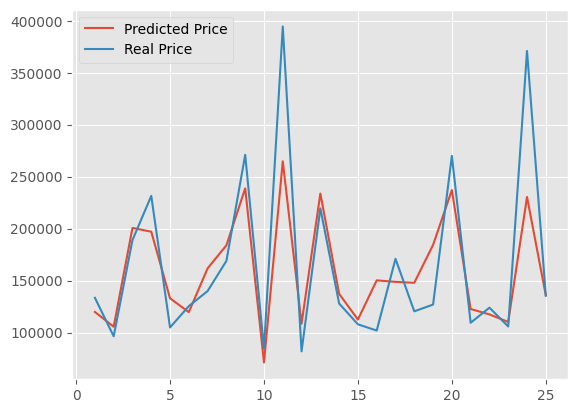

In [5]:
plt.plot(X_num, pred_price, label='Predicted Price')
plt.plot(X_num, real_price, label='Real Price')
plt.legend()
plt.show();